In [86]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [96]:
location = '~/Documents/SMAI/Assignment2/RobotDataset/Robot1'
dataframe = pd.read_csv(location)
train  = dataframe[:int(0.8*len(dataframe))]
test = dataframe[int(0.8*len(dataframe)):]

In [97]:
def predict(test_row,train_row):
    euclid_dist = 0
    for attribute in range(1,len(test_row) - 1):
        euclid_dist+=(pow(test_row[attribute] - train_row[attribute],2))
    return euclid_dist    

In [98]:
def getsecond(item):
    return item[1]
def KNN(test,train,K):
    predicted = []
    for test_row in test.values:
        knn = []
        count_0 = 0
        count_1 = 0
        for train_row in train.values:
            y = predict(test_row,train_row)
            knn.append((train_row[0],y))
        knn.sort(key = getsecond)
        for i in range(0,K):
            if knn[i][0] == 0:
                count_0+=1
            else: count_1+=1
        if count_1>=count_0:
            predicted.append(1)
        else:
            predicted.append(0)
    return predicted        

In [99]:
def measure(predicted_y,test):
    j = 0
    TN=0
    TP=0
    FN=0
    FP=0
    for i in predicted_y:
        if i==0 and i == (test.values)[j][0]:
            TN+=1
        elif i==0 and i!= (test.values)[j][0]:
            FP+=1
        elif i==1 and i == (test.values)[j][0]:
            TP+=1
        elif i==1 and i!= (test.values)[j][0]:
            FN+=1
        j+=1
        
    accuracy =  (TP+TN)/(TP+TN+FP+FN)
    return accuracy

In [102]:
def gen_KNN_plot():
    K = 1
    K_array = []
    accuracy_array = []
    while K<= math.sqrt(len(train)):
        predicted_y = KNN(test,train,K)
        accuracy = measure(predicted_y,test)
        K_array.append(K)
        accuracy_array.append(accuracy)
        K+=1
    plt.plot(K_array,accuracy_array)  

    plt.show()


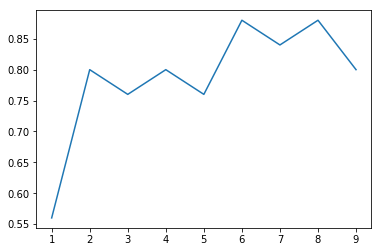

In [103]:
gen_KNN_plot()

In [105]:
predicted_y = KNN(test,train,8)
accuracy = measure(predicted_y,test)
print(accuracy)

0.88
